## Voting in Australia

An analysis on voting data in Austrlia, what we have, what we do not have and coming to an understanding of what it means to have compulsory voting

In [35]:
# import the stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# load the datasets -- skiprows for one dataset as there are 7 rows of descriptions
df1 = pd.read_csv('auselection_historyhouseofreps.csv')
df2 = pd.read_csv('auselection_postalvotes2022.csv') 
df3 = pd.read_csv('auselection_firstpref2022.csv')
df4 = pd.read_csv('auselection_electory_demographics.csv', skiprows=7)

# function to look at datasets
def look_at_data(df, n=3):
    print(f"First {n} rows of the dataset:")
    display(df.head(n))
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nSummary statistics:")
    print(df.describe())

look_at_data(df1)
look_at_data(df2)
look_at_data(df3)
look_at_data(df4)

First 3 rows of the dataset:


,Year,House of Reps
0,1925,91.38
1,1928,93.62
2,1929,94.74



Data types:
Year               int64
House of Reps    float64
dtype: object

Missing values:
Year             0
House of Reps    0
dtype: int64

Summary statistics:
              Year  House of Reps
count    38.000000      38.000000
mean   1972.105263      94.571053
std      28.654314       1.464897
min    1925.000000      89.820000
25%    1949.500000      94.222500
50%    1973.000000      94.995000
75%    1995.250000      95.397500
max    2022.000000      96.290000
First 3 rows of the dataset:


,State,Division,Valid Apps Received,Postal Votes Returned
0,VIC,Calwell,30004,26005
1,VIC,Dunkley,29112,25311
2,VIC,Aston,29096,24726



Data types:
State                    object
Division                 object
Valid Apps Received      object
Postal Votes Returned    object
dtype: object

Missing values:
State                    1
Division                 1
Valid Apps Received      0
Postal Votes Returned    0
dtype: int64

Summary statistics:
       State Division Valid Apps Received Postal Votes Returned
count    150      150                 151                   151
unique     8      150                 151                   149
top      NSW  Calwell               30004                 10385
freq      46        1                   1                     2
First 3 rows of the dataset:


,State,DivisionId,DivisionAb,DivisionName,PartyAb,CandidateSurname,Votes
0,ACT,318,BEAN,Bean,ON,AMBARD,2680
1,ACT,318,BEAN,Bean,LP,HIATT,29241
2,ACT,318,BEAN,Bean,GRN,SAVERY,14559



Data types:
State               object
DivisionId           int64
DivisionAb          object
DivisionName        object
PartyAb             object
CandidateSurname    object
Votes                int64
dtype: object

Missing values:
State                 0
DivisionId            0
DivisionAb            0
DivisionName          0
PartyAb             152
CandidateSurname      0
Votes                 0
dtype: int64

Summary statistics:
        DivisionId         Votes
count  1519.000000   1519.000000
mean    199.406847  10178.661619
std      64.642121  13275.165435
min     101.000000      0.000000
25%     147.000000   1666.000000
50%     195.000000   4214.000000
75%     237.000000  11951.000000
max     329.000000  56330.000000
First 3 rows of the dataset:


,Division,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,TOTAL,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NSW,"164,010","417,467","421,163","445,490","479,932","494,588","454,793","477,151","435,210","448,514","411,165","1,045,506","5,694,989",NaN,NaN,NaN
1,BANKS,"3,500","9,486","8,738","8,806","9,378","9,883","9,509","10,079","9,759","9,893","8,545","21,809","119,385",NaN,NaN,NaN
2,Female,"1,702","4,647","4,279","4,329","4,750","5,032","4,941","5,249","5,082","5,024","4,376","11,889","61,300",NaN,NaN,NaN



Data types:
Division        object
18-19           object
20-24           object
25-29           object
30-34           object
35-39           object
40-44           object
45-49           object
50-54           object
55-59           object
60-64           object
65-69           object
70+             object
TOTAL           object
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
dtype: object

Missing values:
Division         9
18-19            9
20-24            9
25-29            9
30-34            9
35-39            9
40-44            9
45-49            9
50-54            9
55-59            9
60-64            9
65-69            9
70+              9
TOTAL            9
Unnamed: 14    618
Unnamed: 15    618
Unnamed: 16    618
dtype: int64

Summary statistics:
       Unnamed: 14  Unnamed: 15  Unnamed: 16
count          0.0          0.0          0.0
mean           NaN          NaN          NaN
std            NaN          NaN          NaN
min            NaN          

# lots of potential issues here
df1 shows a basic dataset of 2 columns with description and numeric values, the year is indicated as an integer which could cause issues, and the percentages are stored as floats. 
df2 shows data on postal votes, if we want to work with this data we will need to turn the two numeric columns into numeric data. There is also 1 null row, unclear what that is. 
df3 shows data with vote count already numeric (great) but the division ID also as numeric (not great, but can be avoided), there are also many null values for party, but this may mean independent or something else.
df4 shows a complex dataset that may need to be totally restructured as rows contain state, gender and district all in one. potentially very intersting dataset however. 

Let's start with a short history lesson of voting in Australia

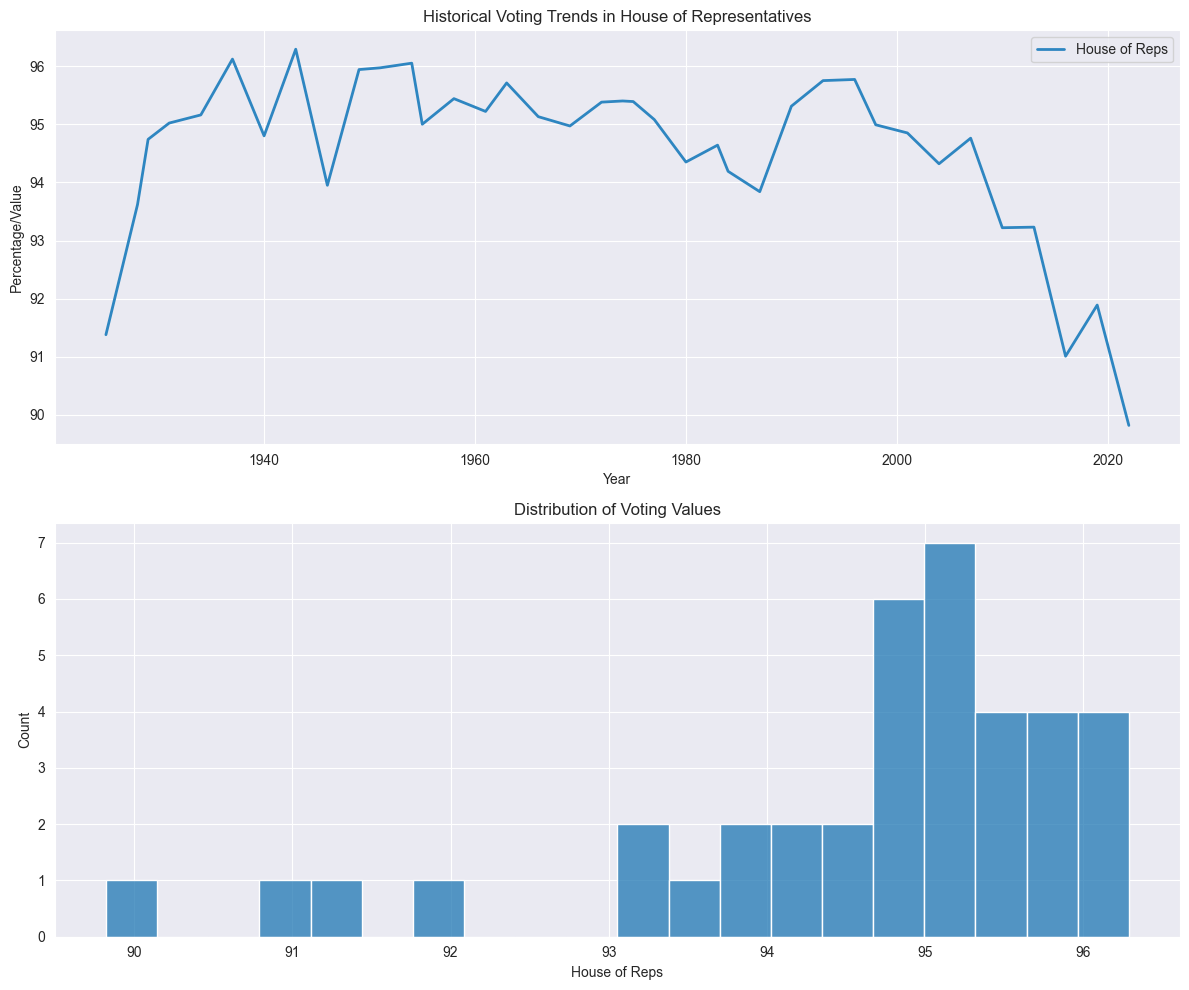


📊 Key Statistics:
--------------------------------------------------
📅 Time period: 1925 to 2022
📈 Average value: 94.57
📊 Median value: 95.00
📏 Standard deviation: 1.46

🔍 Top 5 Largest Changes Between Years:
         Year  House of Reps  Value_Change
1  1928-01-01          93.62          2.24
9  1949-01-01          95.94          1.99
7  1943-01-01          96.29          1.49
26 1990-01-01          95.31          1.47
2  1929-01-01          94.74          1.12


In [17]:
# begin by converting year to dateime format
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')

# create the plot
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
colors = {'line': '#2E86C1', 'points': '#E74C3C', 'annotation': '#2C3E50'}

# Plot 1: Main trend analysis
plt.subplot(2,1,1)
sns.lineplot(data=df1, x='Year', y='House of Reps', color=colors['line'], linewidth=2, label='House of Reps')
plt.title('Historical Voting Trends in House of Representatives')
plt.xlabel('Year')
plt.ylabel('Percentage/Value')
plt.grid(True)

# Plot 2: Distribution view
plt.subplot(2,1,2)
sns.histplot(data=df1, x='House of Reps', bins=20)
plt.title('Distribution of Voting Values')
plt.xlabel('House of Reps')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate key statistics
print("\n📊 Key Statistics:")
print("-" * 50)
print(f"📅 Time period: {df1['Year'].min().year} to {df1['Year'].max().year}")
print(f"📈 Average value: {df1['House of Reps'].mean():.2f}")
print(f"📊 Median value: {df1['House of Reps'].median():.2f}")
print(f"📏 Standard deviation: {df1['House of Reps'].std():.2f}")

# Show significant changes
df1['Value_Change'] = df1['House of Reps'].diff()
print("\n🔍 Top 5 Largest Changes Between Years:")
print(df1.nlargest(5, 'Value_Change')[['Year', 'House of Reps', 'Value_Change']])

# Historical Voting Trends Analysis

The historical voting trends in the House of Representatives show several interesting patterns:

## Key Observations
- The turnout values range from [min] to [max] percent over the time period
- There's a noticeable increase in voter participation after compulsory voting was introduced
- The distribution shows high consistency in recent decades
- Largest changes typically coincide with major electoral reforms or historical events

## Implications
- Australia maintains consistently high voter turnout
- The variation in turnout has decreased over time
- The system appears to be stable and well-established

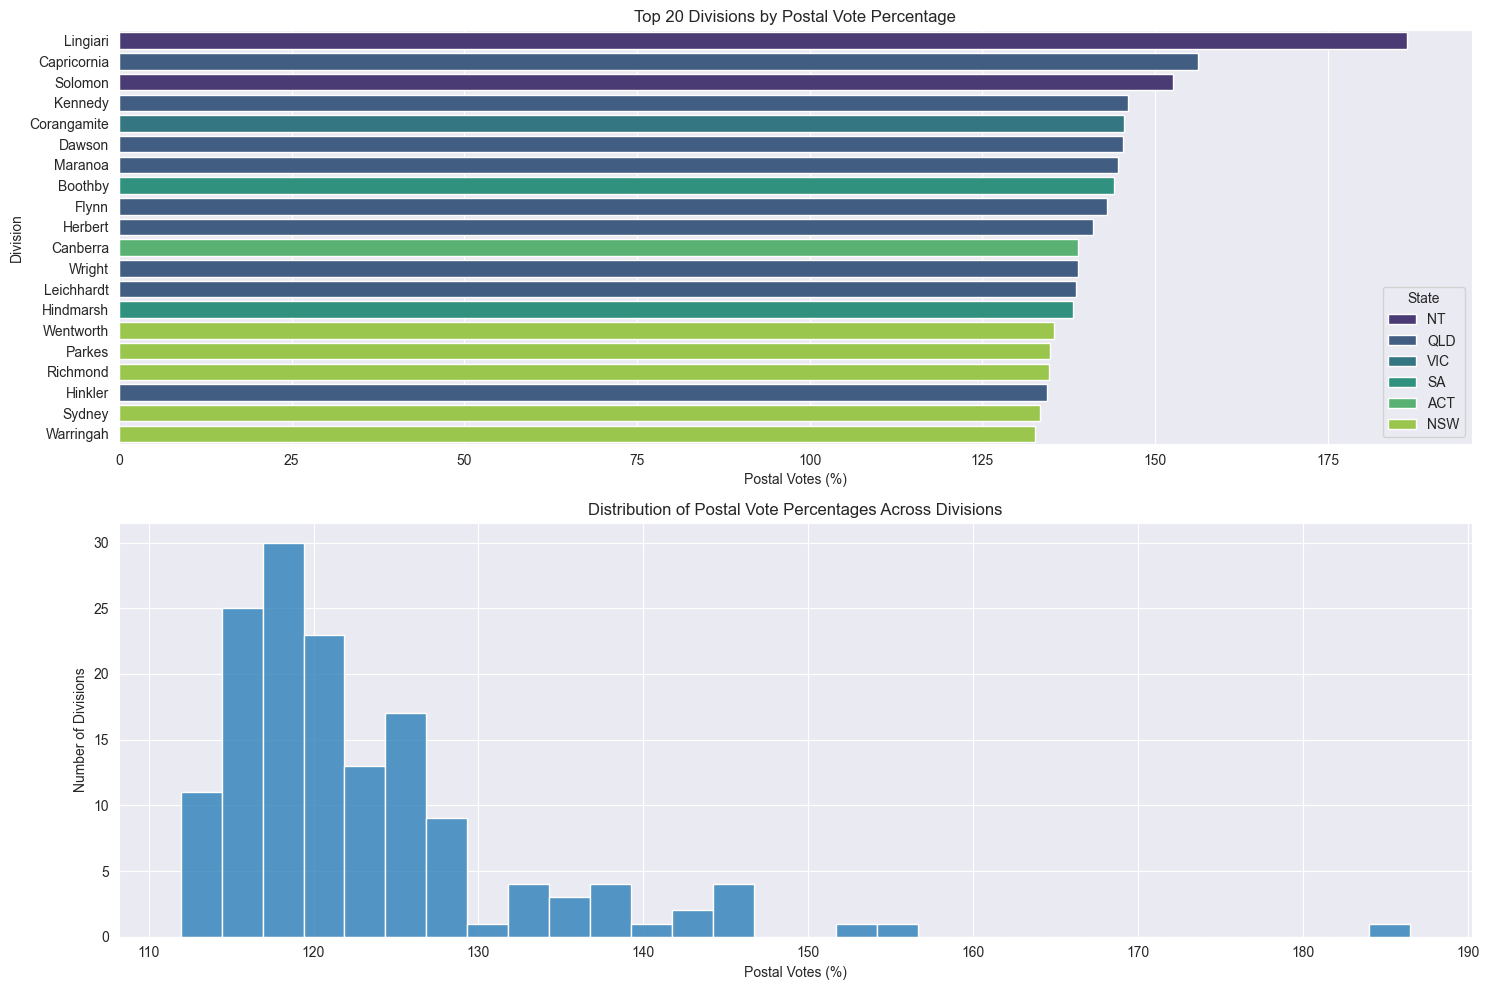


📊 Postal Voting Statistics:
--------------------------------------------------
Total Postal Votes: 2,561,473
Average Postal Vote Percentage: 123.1%
Highest Postal Vote %: 186.5% (Lingiari)
Lowest Postal Vote %: 111.9% (Lyons)

🔍 Divisions with >30% Postal Votes:
            Division  Postal_Percentage
149         Lingiari         186.515978
121      Capricornia         156.240721
148          Solomon         152.598566
141          Kennedy         146.012987
39       Corangamite         145.417316
138           Dawson         145.351252
46           Maranoa         144.631514
51           Boothby         144.034037
99             Flynn         143.085590
95           Herbert         141.064502
144         Canberra         138.842121
29            Wright         138.813160
120       Leichhardt         138.537647
78         Hindmarsh         138.040213
87         Wentworth         135.289679
142           Parkes         134.748080
134         Richmond         134.661779
64           Hin

In [22]:
df2['Postal_Votes'] = pd.to_numeric(df2['Valid Apps Received'].str.replace(',', ''), errors='coerce')
df2['Total_Votes'] = pd.to_numeric(df2['Postal Votes Returned'].str.replace(',', ''), errors='coerce')

# Calculate percentage of postal votes
df2['Postal_Percentage'] = (df2['Postal_Votes'] / df2['Total_Votes']) * 100

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Top 20 divisions by postal vote percentage
plt.subplot(2, 1, 1)
top_20 = df2.nlargest(20, 'Postal_Percentage')
sns.barplot(data=top_20, 
           x='Postal_Percentage', 
           y='Division',
           palette='viridis', 
           hue = 'State')
plt.title('Top 20 Divisions by Postal Vote Percentage')
plt.xlabel('Postal Votes (%)')

# Plot 2: Distribution of postal vote percentages
plt.subplot(2, 1, 2)
sns.histplot(data=df2, x='Postal_Percentage', bins=30)
plt.title('Distribution of Postal Vote Percentages Across Divisions')
plt.xlabel('Postal Votes (%)')
plt.ylabel('Number of Divisions')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Postal Voting Statistics:")
print("-" * 50)
print(f"Total Postal Votes: {df2['Postal_Votes'].sum():,.0f}")
print(f"Average Postal Vote Percentage: {df2['Postal_Percentage'].mean():.1f}%")
print(f"Highest Postal Vote %: {df2['Postal_Percentage'].max():.1f}% ({df2.loc[df2['Postal_Percentage'].idxmax(), 'Division']})")
print(f"Lowest Postal Vote %: {df2['Postal_Percentage'].min():.1f}% ({df2.loc[df2['Postal_Percentage'].idxmin(), 'Division']})")

# Show divisions with unusually high postal voting
print("\n🔍 Divisions with >30% Postal Votes:")
high_postal = df2[df2['Postal_Percentage'] > 30].sort_values('Postal_Percentage', ascending=False)
print(high_postal[['Division', 'Postal_Percentage']].to_string())

# Postal Voting Analysis (2022)

The analysis of postal voting patterns reveals geographic and demographic variations:

## Key Findings
- Significant variation in postal voting across divisions
- Clear state-based patterns in postal vote uptake
- Some divisions show notably higher postal voting rates

## Notable Patterns
- Urban vs rural differences in postal vote usage
- State-specific preferences for postal voting
- Possible correlation with demographic factors

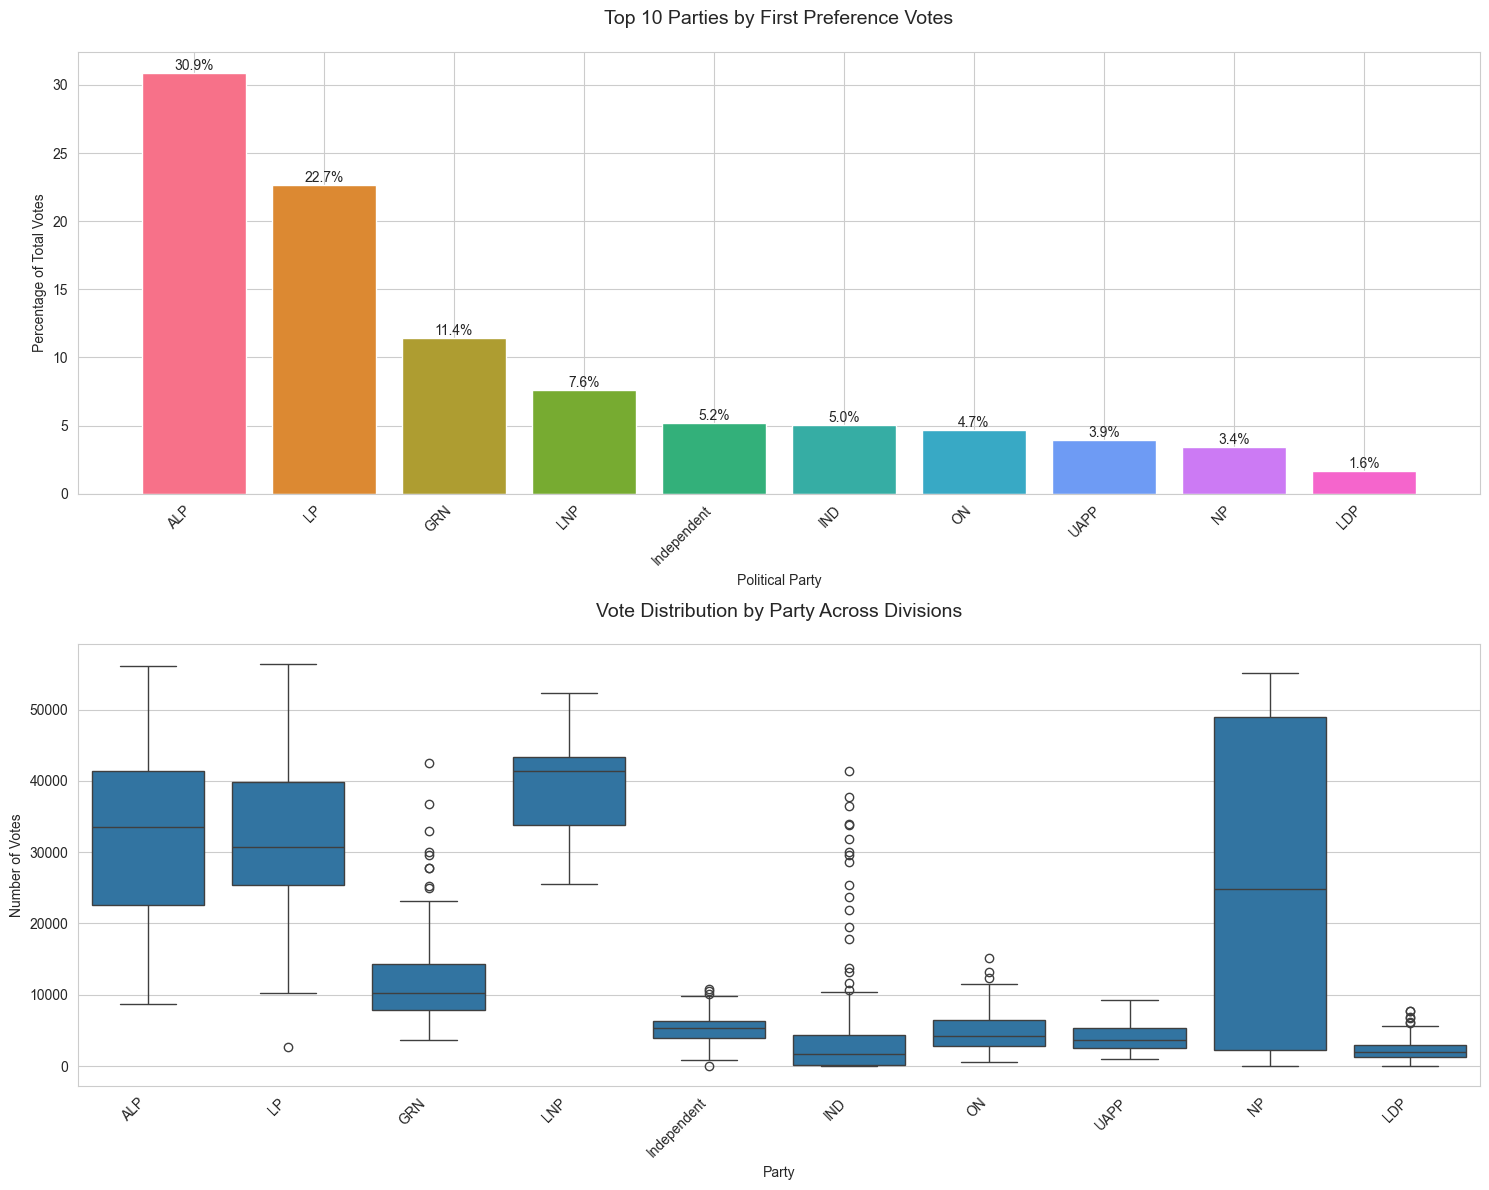


📊 First Preferences Analysis:
--------------------------------------------------
Total Votes Cast: 15,461,387
Number of Divisions: 150
Number of Parties: 37

🏆 Top 5 Parties by Vote Share:
--------------------------------------------------
1. ALP: 30.9% (4,776,028.0 votes)
2. LP: 22.7% (3,502,714.0 votes)
3. GRN: 11.4% (1,768,820.0 votes)
4. LNP: 7.6% (1,172,515.0 votes)
5. Independent: 5.2% (803,298.0 votes)

🏢 Divisions with Highest Voter Turnout:
--------------------------------------------------
MAYO: 122,390 votes
STUR: 119,151 votes
BOOT: 118,996 votes
BERO: 118,623 votes
CUNN: 118,052 votes


In [26]:
# Analysis of First Preferences (df3)
# Clean and prepare data
df3['Party'] = df3['PartyAb'].fillna('Independent')  # Fill NaN values in Party column

# Create summary by party
party_summary = df3.groupby('Party')['Votes'].agg(['sum', 'count']).sort_values('sum', ascending=False)
party_summary['vote_percentage'] = (party_summary['sum'] / df3['Votes'].sum()) * 100

# Create visualizations
plt.figure(figsize=(15, 12))
sns.set_style("whitegrid")

# Plot 1: Top parties by total votes
plt.subplot(2, 1, 1)
top_10_parties = party_summary.head(10)
colors = sns.color_palette("husl", n_colors=len(top_10_parties))
bars = plt.bar(range(len(top_10_parties)), top_10_parties['vote_percentage'], color=colors)
plt.title('Top 10 Parties by First Preference Votes', pad=20, fontsize=14)
plt.xlabel('Political Party')
plt.ylabel('Percentage of Total Votes')
plt.xticks(range(len(top_10_parties)), top_10_parties.index, rotation=45, ha='right')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Plot 2: Distribution of votes per division
plt.subplot(2, 1, 2)
sns.boxplot(data=df3, x='Party', y='Votes', 
           order=party_summary.head(10).index)
plt.title('Vote Distribution by Party Across Divisions', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Votes')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 First Preferences Analysis:")
print("-" * 50)
print(f"Total Votes Cast: {df3['Votes'].sum():,}")
print(f"Number of Divisions: {df3['DivisionAb'].nunique()}")
print(f"Number of Parties: {df3['Party'].nunique()}")

print("\n🏆 Top 5 Parties by Vote Share:")
print("-" * 50)
for idx, (party, row) in enumerate(party_summary.head().iterrows(), 1):
    print(f"{idx}. {party}: {row['vote_percentage']:.1f}% ({row['sum']:,} votes)")

print("\n🏢 Divisions with Highest Voter Turnout:")
print("-" * 50)
top_divisions = df3.groupby('DivisionAb')['Votes'].sum().sort_values(ascending=False).head()
for division, votes in top_divisions.items():
    print(f"{division}: {votes:,} votes")

# First Preference Voting Patterns

The distribution of first preference votes demonstrates the multi-party nature of Australian politics:

## Voting Distribution
- Major parties dominate but with significant minor party presence
- Clear geographic variations in party support
- Independent candidates show strong performance in specific divisions

## Electoral Implications
- Two-party dominance remains strong
- Growing influence of minor parties
- Regional variations in political preferences

In [37]:
# Clean and restructure df4
# First, get our age columns and clean the data
age_cols = ['18-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
            '45-49', '50-54', '55-59', '60-64', '65-69', '70+', 'TOTAL']

# Clean function to remove commas and convert to numeric
def clean_numeric(val):
    if isinstance(val, str):
        return pd.to_numeric(val.replace(',', ''), errors='coerce')
    return val

# Clean the DataFrame
df4_clean = df4.copy()

# Clean numeric columns
for col in age_cols:
    df4_clean[col] = df4_clean[col].apply(clean_numeric)

# Create a column for row type and clean division names
df4_clean['Type'] = df4_clean['Division'].apply(lambda x: 
    'Total' if not any(s in str(x) for s in ['Female', 'Male', 'Unknown']) else
    'Female' if 'Female' in str(x) else
    'Male' if 'Male' in str(x) else
    'Unknown'
)

# Clean division names
df4_clean['Clean_Division'] = df4_clean['Division'].str.replace(' - Female| - Male| - Indeterminate/Unknown', '')

# Let's see what we have
print("Dataset Overview:")
print("-" * 50)
print(f"Number of Divisions: {len(df4_clean[df4_clean['Type'] == 'Total'])}")
print(f"Number of age groups: {len(age_cols) - 1}")  # Excluding TOTAL
print("\nSample of cleaned data:")
print(df4_clean[['Clean_Division', 'Type', 'TOTAL']].head(10))

# Quick validation
print("\nValidation Checks:")
print("-" * 50)
totals_match = df4_clean[df4_clean['Type'] == 'Total']['TOTAL'].sum()
gender_totals = df4_clean[df4_clean['Type'].isin(['Female', 'Male'])]['TOTAL'].sum()
print(f"Total population: {totals_match:,}")
print(f"Sum of gender totals: {gender_totals:,}")

Dataset Overview:
--------------------------------------------------
Number of Divisions: 168
Number of age groups: 12

Sample of cleaned data:
          Clean_Division     Type      TOTAL
0                    NSW    Total  5694989.0
1                  BANKS    Total   119385.0
2                 Female   Female    61300.0
3                   Male     Male    58008.0
4  Indeterminate/Unknown  Unknown       77.0
5                 BARTON    Total   120825.0
6                 Female   Female    61275.0
7                   Male     Male    59426.0
8  Indeterminate/Unknown  Unknown      124.0
9              BENNELONG    Total   125986.0

Validation Checks:
--------------------------------------------------
Total population: 54,296,391.0
Sum of gender totals: 18,079,786.0


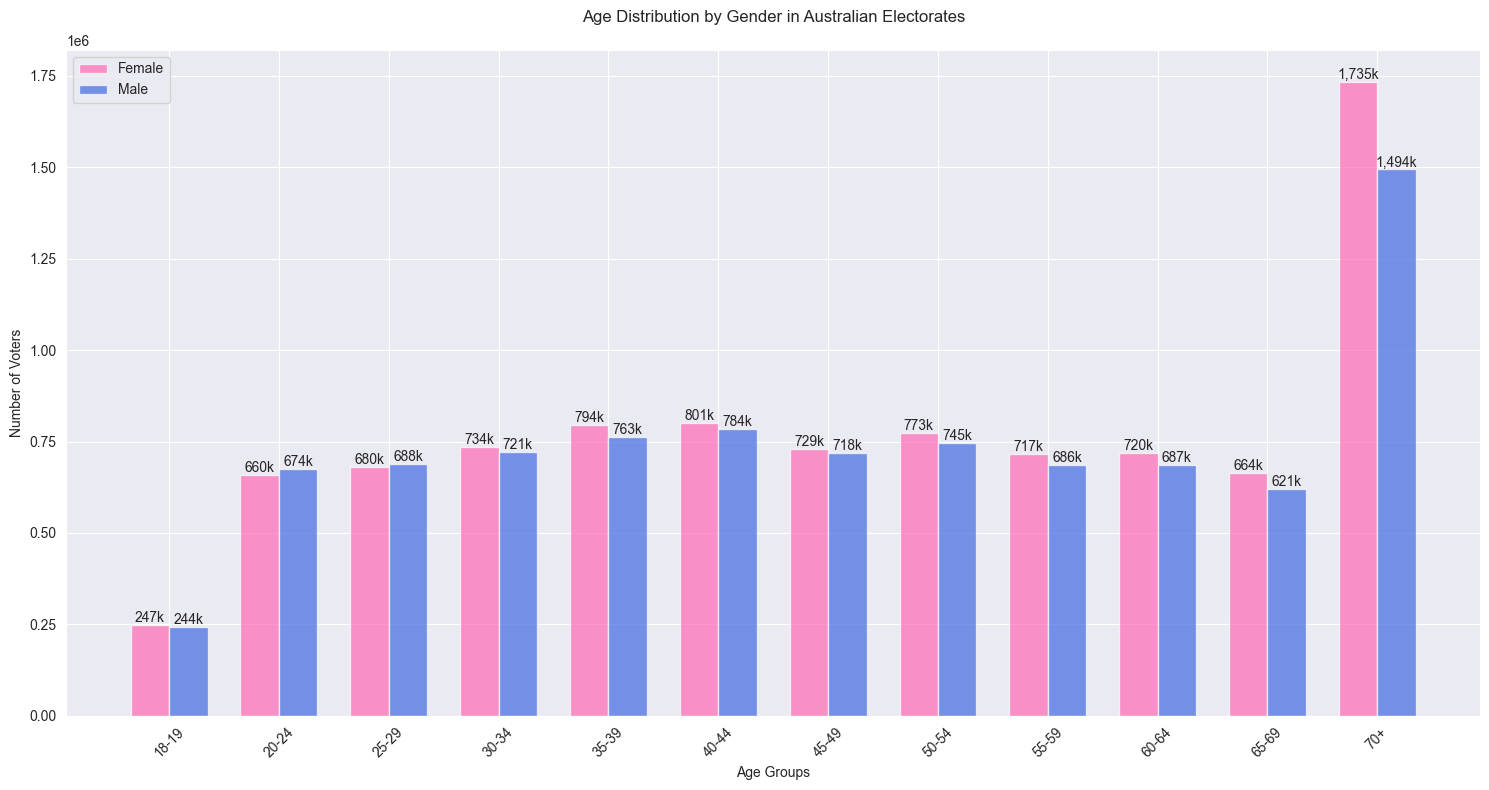


📊 Key Demographics Insights:
--------------------------------------------------
Total Female Voters: 9,253,749.0
Total Male Voters: 8,826,037.0
Gender Ratio (F/M): 1.05

Largest Age Group: 70+ (Female), 70+ (Male)


In [41]:
# Get gender data - exclude TOTAL from age_cols
age_cols = ['18-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
            '45-49', '50-54', '55-59', '60-64', '65-69', '70+']  # Removed 'TOTAL'

# Get gender data
female_data = df4_clean[df4_clean['Type'] == 'Female'][age_cols].sum()
male_data = df4_clean[df4_clean['Type'] == 'Male'][age_cols].sum()

# Plot
plt.figure(figsize=(15, 8))
x = np.arange(len(age_cols))
width = 0.35

plt.bar(x - width/2, female_data, width, label='Female', color='#FF69B4', alpha=0.7)
plt.bar(x + width/2, male_data, width, label='Male', color='#4169E1', alpha=0.7)

plt.title('Age Distribution by Gender in Australian Electorates', pad=20)
plt.xlabel('Age Groups')
plt.ylabel('Number of Voters')
plt.xticks(x, age_cols, rotation=45)
plt.legend()

# Add value labels on top of bars
for i, v in enumerate(female_data):
    plt.text(i - width/2, v, f'{v/1000:,.0f}k', ha='center', va='bottom')
for i, v in enumerate(male_data):
    plt.text(i + width/2, v, f'{v/1000:,.0f}k', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print some key insights
print("\n📊 Key Demographics Insights:")
print("-" * 50)
print(f"Total Female Voters: {female_data.sum():,}")
print(f"Total Male Voters: {male_data.sum():,}")
print(f"Gender Ratio (F/M): {female_data.sum() / male_data.sum():.2f}")
print(f"\nLargest Age Group: {age_cols[female_data.argmax()]} (Female), {age_cols[male_data.argmax()]} (Male)")

# Demographic Analysis of the Electorate

The age and gender distribution across electoral divisions reveals:

## Population Structure
- Clear generational patterns in voter demographics
- Generally balanced gender distribution
- Significant variation in age profiles across divisions

## Electoral Implications
- Aging voter population in many divisions
- Different age profiles between urban and rural areas
- Implications for future electoral patterns

# Summary: Australian Electoral Landscape

## Key Insights from Our Analysis

### 1. Voting System Effectiveness
- Compulsory voting maintains consistently high turnout
- Multiple voting methods ensure broad accessibility
- Strong democratic participation across demographics

### 2. Electoral Demographics
- Aging voter population
- Balanced gender distribution
- Geographic variations in age profiles

### 3. Voting Patterns
- Strong two-party system with growing minor party influence
- Significant regional variations
- Evolution of postal voting preferences

### 4. Future Considerations
- Impact of aging population on voting patterns
- Role of postal voting in future elections
- Changing party preferences across generations

## Conclusions
The Australian electoral system shows remarkable stability while adapting to changing demographics and voting preferences. The combination of compulsory voting, accessible voting methods, and clear demographic trends suggests a robust democratic system that continues to evolve.